## Name: Vimal Galani <br> Batch: L1 <br> Roll No: 31127

### Problem Statement

Create a Linear Regression Model using Python/R to predict home prices using Boston Housing Dataset (https://www.kaggle.com/c/boston-housing). The Boston Housing dataset contains information about various houses in Boston through different parameters. There are 506 samples and 14 feature variables in this dataset.

The objective is to predict the value of prices of the house using the given features.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd

# For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data 
from sklearn.datasets import load_boston

loaded_data = load_boston()

# Convert the result into dataframe
raw_data = pd.DataFrame(loaded_data.data, columns=loaded_data.feature_names)

/home/vimal/.local/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing datas

In [3]:
# .head() can be used to print the first 5 entries in the dataset
raw_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### About the Data

In [4]:
print("The shape of the data is: ", raw_data.shape)
print("Thus, the number of columns/attributes are: ", raw_data.shape[1])

The shape of the data is:  (506, 13)
Thus, the number of columns/attributes are:  13


### Data Preprocessing

In [10]:
# First, let us get the target values loaded into a Series
target_array = loaded_data.target

# Convert numpy array into pandas series
target_data = pd.Series(target_array, name='target')

target_data.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: target, dtype: float64

In [7]:
# Using .describe() to get Statistical Summary
raw_data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [8]:
# Check if there are any null values in the dataset
print("Number of Null values in each attribute is:")
print(raw_data.isna().sum())
print("\nNumber of Null values in target is: ", target_data.isna().sum())

Number of Null values in each attribute is:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

Number of Null values in target is:  0


In [28]:
# Create a copy of raw data which will also store the target values
complete_data = raw_data.copy()

complete_data['target'] = target_data

complete_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Visualization

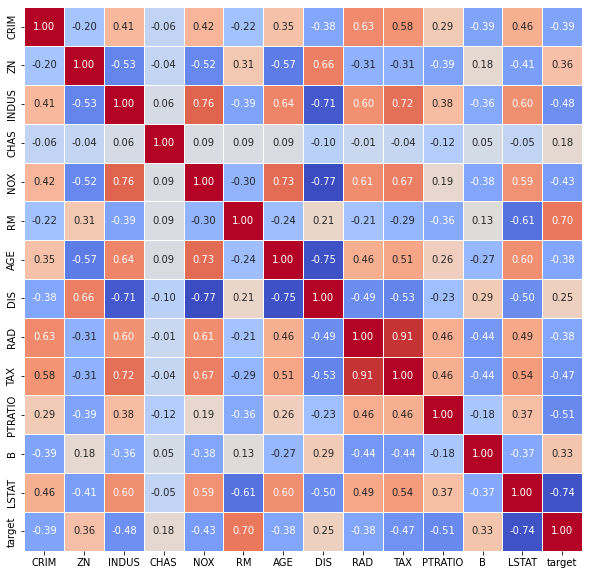

In [11]:
# Finding pearson coefficient for all attributes
corr = complete_data.corr()

# Plot the data in the form of a heatmap
plt.figure(figsize=(10, 10))

sns.heatmap(corr, annot=True, fmt='.2f', cbar=False, cmap="coolwarm", linewidth=0.5)

plt.show()

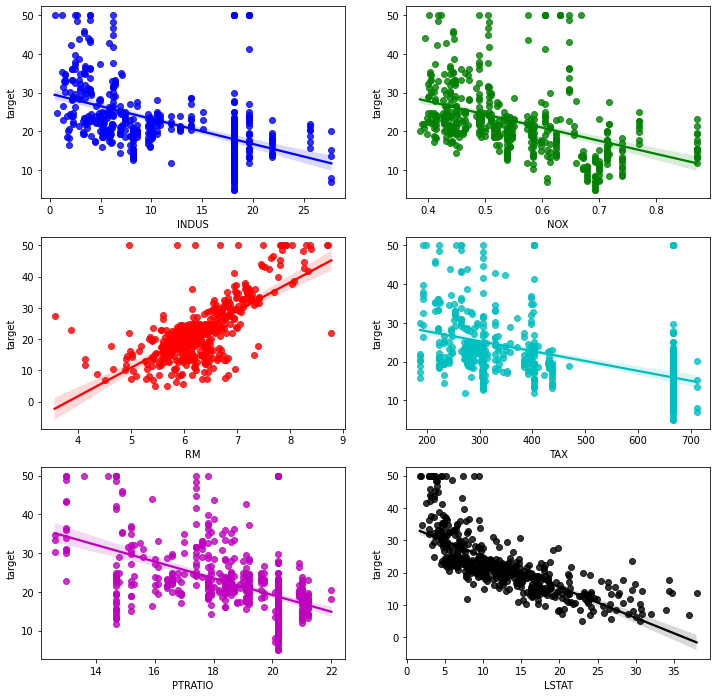

In [13]:
# Now, let us plot all the attributes with a high coefficient
plot_list = ['INDUS', 'NOX', 'RM', 'TAX', 'PTRATIO', 'LSTAT']
color_list = ['b', 'g', 'r', 'c', 'm', 'k']

x_plot = complete_data.loc[:, plot_list]
y_plot = complete_data['target']

fig, axes = plt.subplots(3, 2, figsize=(12,12))
axes_flatten = axes.flatten()

index = 0
for i in plot_list:
    sns.regplot(y=y_plot, x=x_plot[i], ax=axes_flatten[index], color=color_list[index])
    index += 1

### Creating the Model 

In [17]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

# Separate the dependant and independant variables
X = complete_data.drop('target', axis=1) 
y = complete_data['target']

# Store a copy of X for later use
X_copy = X.copy()


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Scaling the data to improve model accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)


# Get the X_test data which is not scaled
_, unscaled_X_test, _, _ = train_test_split(X_copy, y, test_size=0.4, random_state=42)

In [18]:
print("Shape of X_train is: ", X_train.shape)
print("Shape of X_test is: ", X_test.shape)
print("Shape of y_train is: ", y_train.shape)
print("Shape of y_test is: ", y_test.shape)

Shape of X_train is:  (303, 13)
Shape of X_test is:  (203, 13)
Shape of y_train is:  (303,)
Shape of y_test is:  (203,)


In [19]:
# Linear Regression Model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [20]:
# Train the data 
model.fit(X_train, y_train)

LinearRegression()

In [21]:
# Get the Prediction
y_preds = model.predict(X_test)

### Performance testing

In [22]:
# Print out the different performance metrics for the model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse = mean_squared_error(y_test, y_preds)
mae = mean_absolute_error(y_test, y_preds)
r2_score = r2_score(y_test, y_preds)

print('For testing data:')
print('Mean Squared Error is: ', mse)
print('Mean absolute Error is: ', mae)
print('R2 score is: ', r2_score)

For testing data:
Mean Squared Error is:  21.83270998957743
Mean absolute Error is:  3.2979696834924144
R2 score is:  0.7125140936111224


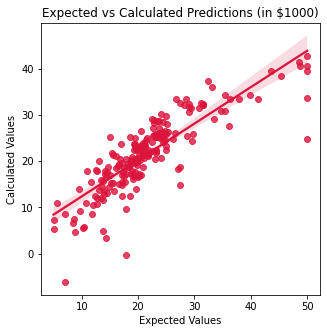

In [23]:
# Plotting predicted and target results
plt.figure(figsize=(5,5))

# Scatter Plot
sns.regplot(x=y_test, y=y_preds, color='crimson')

plt.title("Expected vs Calculated Predictions (in $1000)")
plt.xlabel("Expected Values")
plt.ylabel("Calculated Values")
plt.show()

In [24]:
# Print the coefficients of the regression model
np.set_printoptions(suppress=True)

coeff_dataframe = pd.DataFrame({'Attribute': X.columns, 'Regression Coefficient': model.coef_})

coeff_dataframe

,Attribute,Regression Coefficient
0,CRIM,-0.898090
1,ZN,0.899703
2,INDUS,0.209110
3,CHAS,0.871838
4,NOX,-1.665965
5,RM,2.786265
6,AGE,-0.498383
7,DIS,-3.232802
8,RAD,2.180745
9,TAX,-1.663408


In [25]:
# Add the Final Predictions in dataframe
final_data = unscaled_X_test.copy()
final_data['Target'] = y_test
final_data['Prediction'] = y_preds

final_data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Target,Prediction
173,0.09178,0.0,4.05,0.0,0.510,6.416,84.1,2.6463,5.0,296.0,16.6,395.50,9.04,23.6,28.700257
274,0.05644,40.0,6.41,1.0,0.447,6.758,32.9,4.0776,4.0,254.0,17.6,396.90,3.53,32.4,37.275424
491,0.10574,0.0,27.74,0.0,0.609,5.983,98.8,1.8681,4.0,711.0,20.1,390.11,18.07,13.6,14.450663
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52,22.8,25.734356
452,5.09017,0.0,18.10,0.0,0.713,6.297,91.8,2.3682,24.0,666.0,20.2,385.09,17.27,16.1,18.497639
